---

title: 用模拟的方法来学习统计学
date: 2024-09-17
author: 郝鸿涛
slug: stats-simulation
draft: true
toc: true
tags: 统计学

---

我们先来理解一下标准误差。平常，如果你不用模拟的方法，你只会记住标准误差的共识，但是你并不理解为什么会是这样子。

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Parameters for the normal distribution
mean = 100       # Mean of the distribution
std_dev = 15    # Standard deviation of the distribution
size = 100000    # Number of data points

# Generate the data
data = np.random.normal(mean, std_dev, size)

data[:10]

array([107.4507123 ,  97.92603548, 109.71532807, 122.84544785,
        96.48769938,  96.48794565, 123.68819223, 111.51152094,
        92.95788421, 108.13840065])

In [50]:
population_mu = np.mean(data)
population_sigma = np.std(data)

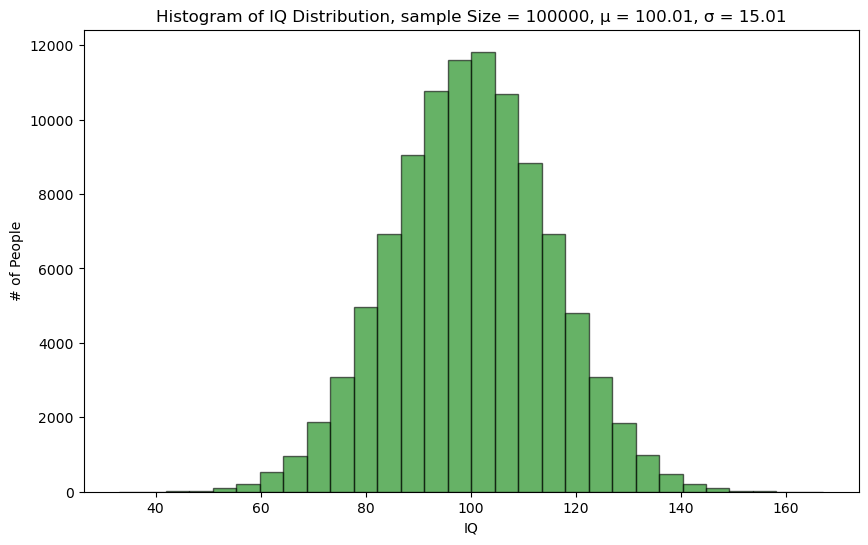

In [45]:
# Create a histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=False, alpha=0.6, color='g', edgecolor='black')

# Add titles and labels
plt.title(f'Histogram of IQ Distribution, sample Size = {size}, μ = {
          population_mu:.2f}, σ = {population_sigma:.2f}')
plt.xlabel('IQ')
plt.ylabel('# of People')

# Show the plot
plt.show()

In [46]:
def obtain_sample_means(data, sample_size, num_samples):
    """sample from data, each time to get sample_size and calcuate the mean
    continue for num_samples times. 
    """
    sample_means = np.zeros(num_samples)
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        sample_means[i] = np.mean(sample)
    return sample_means

In [47]:
num_samples = 1000
sample_sizes = [10, 100, 1000, 10000]
sample_means = {size: obtain_sample_means(
    data, size, num_samples) for size in sample_sizes}
sample_means['num_samples'] = num_samples

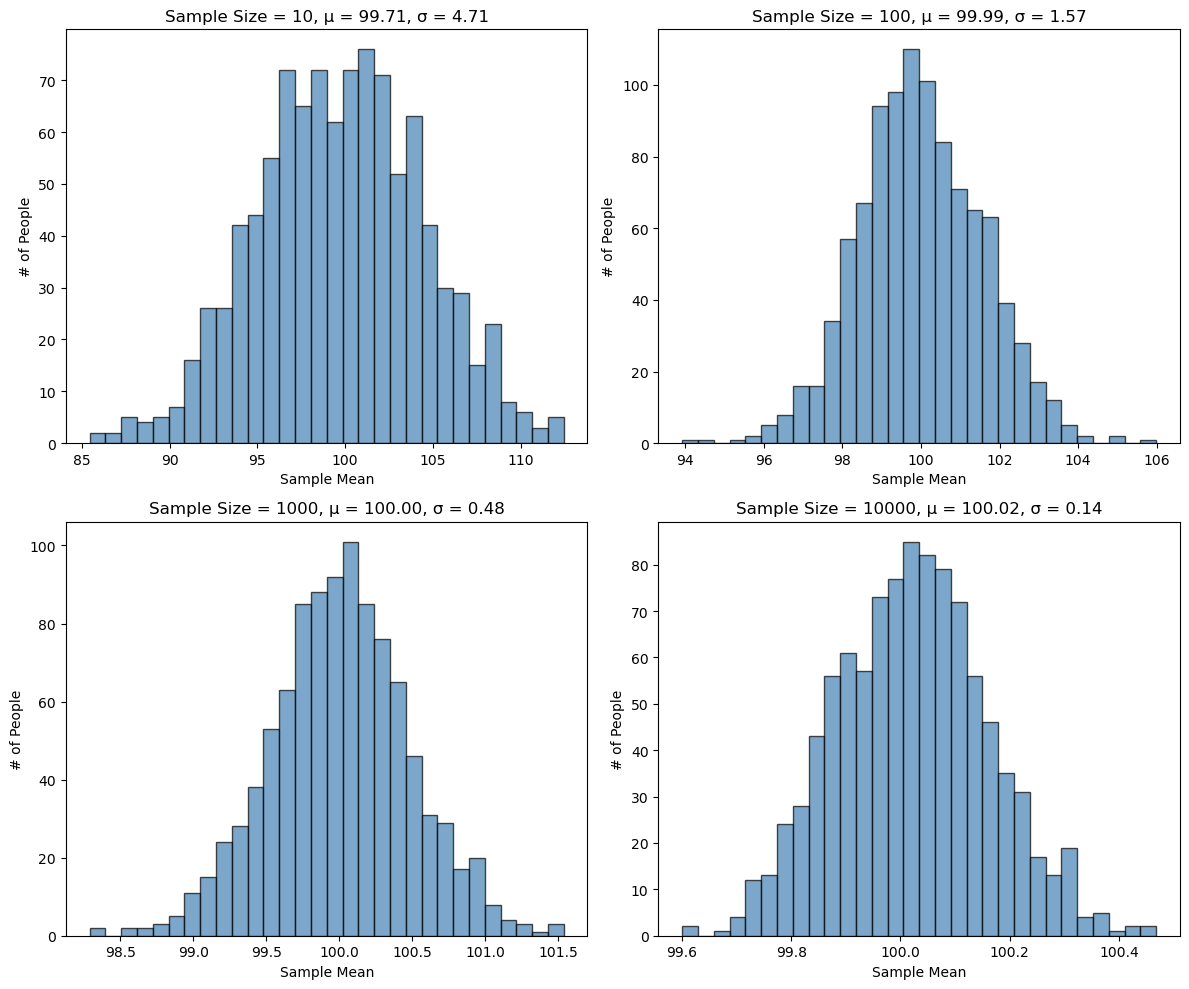

In [48]:
# Plotting
plt.figure(figsize=(12, 10))

# Create subplots
for i, size in enumerate(sample_sizes):
    sub_data = sample_means[size]
    mu = np.mean(sub_data)
    sigma = np.std(sub_data)
    plt.subplot(2, 2, i + 1)  # 2x2 grid, subplot index starts at 1
    plt.hist(sub_data, bins=30, density=False, alpha=0.7, color='steelblue', edgecolor='black')
    plt.title(f'Sample Size = {size}, μ = {mu:.2f}, σ = {sigma:.2f}')    
    plt.xlabel('Sample Mean')
    plt.ylabel('# of People')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
print(f"Population mu: {population_mu}, Population std: {population_sigma}")
for sample_size in sample_sizes:
    sub_data = sample_means[size]
    mu = np.mean(sub_data)
    sigma = np.std(sub_data)

4.747690091711915